# BiG-SCAPE results analysis

Author: Sandra Godinho Silva \
Creation date: 26/06/2020 \
Version: 0.1

In [31]:
# import standard Python modules
import os
import numpy as np
import pandas as pd
import re
from collections import Counter
import csv

os.chdir("/home/gomes/silva2/3_Annotation/bigscape/")

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

# Data preparation

In [33]:
def LoadMetadata():
    metadata = pd.read_csv("/home/gomes/silva2/Figure_1_Dataset/All_info.csv")
    return metadata
metadata = LoadMetadata() 
metadata  = metadata[["Assembly accession", "Genus", "Family", "Origin", "MAG","Completeness","Contamination","Strain_heterogeneity","Quality_score"]]
metadata.head()

,Assembly accession,Genus,Family,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.14,0.0,98.95
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae,Non_marine,False,100.00,0.00,0.0,100.00
2,GCA_000023465.1,Zunongwangia,Flavobacteriaceae,Unclassified,False,99.62,0.57,0.0,96.77
3,GCA_000023725.1,Kaistella,Weeksellaceae,Non_marine,False,100.00,0.00,0.0,100.00
4,GCA_000024125.1,Robiginitalea,Flavobacteriaceae,Unclassified,False,99.01,0.11,0.0,98.46


In [34]:
bgcs = pd.read_csv("/home/gomes/silva2/3_Annotation/antismash_results/bgc_antismash_class_counts.csv", index_col=0)
bgcs.head(2)

,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,...,GCA_004797125.1,GCA_005780245.1,GCA_002711185.1,GCA_003095655.1,GCA_014220185.1,GCA_011524905.1,GCA_002302475.1,GCA_002741945.1,GCA_009663485.1,GCA_014218825.1
T3PKS,1,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
"terpene,bacteriocin",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bgc_t = bgcs.T
bgc_t.head(2)

,T3PKS,"terpene,bacteriocin",terpene,LAP,bacteriocin,siderophore,"hglE-KS,T1PKS",microviridin,"resorcinol,arylpolyene",NRPS-like,...,"hglE-KS,terpene,T1PKS","terpene,betalactone","ladderane,transAT-PKS,PKS-like,transAT-PKS-like","transAT-PKS,NRPS-like",cyanobactin,"siderophore,NRPS","lanthipeptide,hglE-KS,T1PKS","transAT-PKS-like,transAT-PKS,T3PKS,PKS-like,NRPS-like","hglE-KS,T1PKS,PUFA","transAT-PKS,PKS-like,ladderane"
GCA_002831645.1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_001971785.1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
merge = pd.merge(bgc_t, metadata, how="left", left_index=True, right_on="Assembly accession")
merge.set_index("Assembly accession", inplace=True)
merge3 = merge.copy()
merge.head(2)

,T3PKS,"terpene,bacteriocin",terpene,LAP,bacteriocin,siderophore,"hglE-KS,T1PKS",microviridin,"resorcinol,arylpolyene",NRPS-like,...,"hglE-KS,T1PKS,PUFA","transAT-PKS,PKS-like,ladderane",Genus,Family,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score
Assembly accession,,,,,,,,,,,,,,,,,,,,,
GCA_002831645.1,1,1,1,1,0,0,0,0,0,0,...,0,0,Olleya,Flavobacteriaceae,Marine,False,99.67,0.33,0.0,98.02
GCA_001971785.1,0,0,1,0,1,0,0,0,0,0,...,0,0,Seonamhaeicola,Flavobacteriaceae,Unclassified,False,98.35,1.25,0.0,92.10


In [37]:
merge3_reduced = merge3.drop(columns=["Genus", "Family", "Origin", "MAG","Completeness","Contamination","Strain_heterogeneity","Quality_score"])
merge_include = merge3[["Genus", "Family", "Origin"]]
merge3_reduced[ merge3_reduced >0] =1
merge4 = pd.merge(merge3_reduced, merge_include, how="left", left_index=True, right_index=True)
merge4.head()
merge4.to_csv("BGC_counts_PA.csv")

In [38]:
merge2 = merge.copy()
merge2["SUM"] = merge2.apply(pd.to_numeric, errors='ignore').sum(axis=1)
numeric_cols = merge2.select_dtypes(exclude=["object"]).columns.to_list()
numeric_cols.remove("SUM")
merge[numeric_cols] = merge2[numeric_cols].div(merge2["SUM"], axis=0)#.multiply(1000)
merge2.drop(columns="SUM", inplace=True)
merge2.head()
merge2.to_csv("BGC_counts_mean.csv")

## BGC all info

In [39]:
bgc_all_info = pd.read_csv("/home/gomes/silva2/3_Annotation/antismash_results/all_BGC_info.csv")
bgc_all_info["name"]= bgc_all_info["Correct_name"].str.split("_", expand=True)[2]
bgc_all_info['BGC_name'] = bgc_all_info[['Genome', 'name']].agg('_'.join, axis=1)
bgc_all_info = bgc_all_info.drop(columns=["Correct_name","name", "Genome"])
bgc_all_info.head()

,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_ cluster,Most_similar_classif,Similarity,BGC_name
0,Region&nbsp1,T3PKS,PKSIII,582350.0,623402,41052.0,NaN,NaN,NaN,GCA_002831645.1_contig1.region001
1,Region&nbsp2,"terpene,bacteriocin",Others,1879449.0,1909353,29904.0,NaN,NaN,NaN,GCA_002831645.1_contig1.region002
2,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645.1_contig1.region003
3,Region&nbsp4,LAP,RiPPs,2236187.0,2258361,22174.0,NaN,NaN,NaN,GCA_002831645.1_contig1.region004
4,Region&nbsp1,bacteriocin,RiPPs,1547629.0,1559785,12156.0,NaN,NaN,NaN,GCA_001971785.1_contig1.region001


In [40]:
len(bgc_all_info)

9330

## Clans and families

In [41]:
bigscape = pd.read_csv("Clans_and_families.csv")
bigscape.head(2)

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family,Pfam_vector,Pfam_vector_length,Pfam_descriptor
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...


In [42]:
bigscape_extended = pd.merge(bigscape, bgc_all_info, how="left", left_on="BGC_full", right_on="BGC_name")
bigscape_extended.head(2)

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family,Pfam_vector,Pfam_vector_length,Pfam_descriptor,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_ cluster,Most_similar_classif,Similarity,BGC_name
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,Region&nbsp6.1,NRPS,NRPS,27019.0,76588.0,49569.0,monobactam,NRP,100%,GCA_001975985.1_contig06.region001
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,Region&nbsp2,NRPS-like,NRPS,1061786.0,1102756.0,40970.0,NaN,NaN,NaN,GCA_000154725.1_contig1.region002


In [43]:
bigscape_extended = pd.merge(bigscape_extended, metadata, how="left", left_on="Genome", right_on="Assembly accession")
bigscape_extended.rename(columns={"Family_x":"Family_bgc","Family_y":"Family_tax"}, inplace=True)
bigscape_extended.head(2)

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,...,BGC_name,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,...,GCA_001975985.1_contig06.region001,GCA_001975985.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.0,99.40
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,...,GCA_000154725.1_contig1.region002,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.0,96.43


In [44]:
bigscape_extended["Known_cluster"] =[False if pd.isnull(x)  else True for x in bigscape_extended["Most_similar_known_ cluster"]]
bigscape_extended.head(2)

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,...,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,...,GCA_001975985.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.0,99.40,True
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,...,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.0,96.43,False


In [45]:
bigscape_extended.to_csv("Clans_and_families_extended.csv", index=False)

### Length of dataset

In [46]:
len(bigscape)

10234

In [47]:
# there are repeated BGCs!
len(bigscape[~bigscape["BGC_full"].duplicated()])

9314

In [48]:
#bigscape[bigscape["BGC_full"].duplicated(keep=False)].sort_values(by="BGC_full").to_csv("Duplicates.csv")

### Description of Clans

In [49]:
df = bigscape_extended.groupby("Clan").count()["Genome"].reset_index()
df.columns = ["Clan", "Nr_BGCs_per_Clan"]
df = df.sort_values(by="Nr_BGCs_per_Clan", ascending=False)
#df.head()

In [50]:
df1 = bigscape_extended.groupby("Clan").count()["Most_similar_known_ cluster"].reset_index()
df1.columns = ["Clan", "Nr_known_clusters"]
df1 = df1.sort_values(by="Nr_known_clusters", ascending=False)
#df1.head()

In [51]:
df2 = bigscape_extended.groupby("Clan")["BiG-SCAPE class"].value_counts().to_frame('counts').reset_index()#.sum()#.sort_values(ascending=False)
df2 = pd.pivot_table(df2, values='counts', index=['Clan'],columns=['BiG-SCAPE class'], aggfunc=np.sum, fill_value=0)
#df2.head()

In [52]:
df3 = bigscape_extended.groupby("Clan")["Most_similar_known_ cluster"].value_counts().sort_values(ascending=False).to_frame('counts').reset_index()#.sum()#.sort_values(ascending=False)
df3 = pd.pivot_table(df3, values='counts', index=['Clan'],columns=['Most_similar_known_ cluster'], aggfunc=np.sum, fill_value=0)
df3.head()

Most_similar_known_ cluster,1-heptadecene,"1-nonadecene / (14Z)-1,14-nonadecadiene",CDA1b / CDA2a / CDA2b / CDA3a / CDA3b / CDA4a / CDA4b,ET-743,K53 capsular polysaccharide,N-myristoyl-D-asparagine / cis-7-tetradecenoyl-D-asparagine / (R)-N1-((S)-5-oxohexan-2-yl)-2-tetradecanamidosuccinamide,N-tetradecanoyl tyrosine,O&amp;K-antigen,O-antigen,TP-1161,...,ravidomycin,rhizomide A / rhizomide B / rhizomide C,s56-p1,simocyclinone D8,syringomycin,toxoflavin / fervenulin,tridecaptin,vazabitide A,xenematide,zwittermicin A
Clan,,,,,,,,,,,,,,,,,,,,,
1848,0,0,0,27,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,7
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
merge = pd.merge(df, df2, how="left", left_on="Clan", right_on="Clan")
merge = pd.merge(merge, df1, how="left", left_on="Clan", right_on="Clan")
merge["%_known_clusters"] = merge["Nr_known_clusters"]/merge["Nr_BGCs_per_Clan"]*100
#merge = pd.merge(merge, df3, how="left", left_on="Clan", right_on="Clan")
merge.head()

,Clan,Nr_BGCs_per_Clan,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene,Nr_known_clusters,%_known_clusters
0,6097,2485,0,80,0,0,0,2405,1694,68.169014
1,4095,1602,0,1602,0,0,0,0,919,57.365793
2,1848,1274,0,252,172,850,0,0,138,10.832025
3,9045,860,0,48,0,0,812,0,40,4.651163
4,4935,835,581,82,172,0,0,0,178,21.317365


In [54]:
df_figure = merge[merge["Nr_BGCs_per_Clan"]>50]
df_figure1 = df_figure.drop(columns=["Nr_BGCs_per_Clan","Nr_known_clusters", "%_known_clusters"])
df_figure.head()

,Clan,Nr_BGCs_per_Clan,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene,Nr_known_clusters,%_known_clusters
0,6097,2485,0,80,0,0,0,2405,1694,68.169014
1,4095,1602,0,1602,0,0,0,0,919,57.365793
2,1848,1274,0,252,172,850,0,0,138,10.832025
3,9045,860,0,48,0,0,812,0,40,4.651163
4,4935,835,581,82,172,0,0,0,178,21.317365


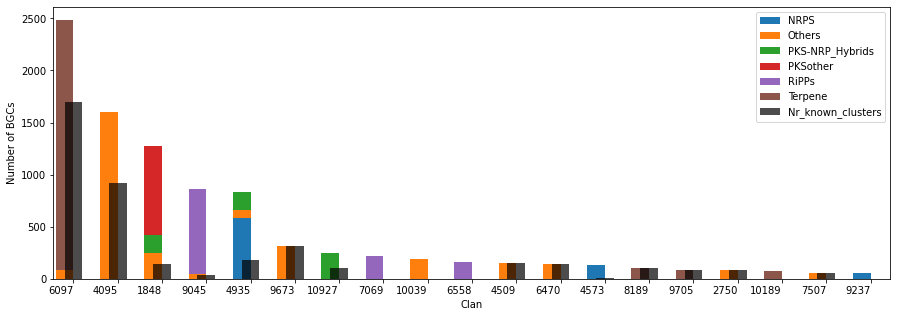

In [58]:
#https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4
df_figure1.plot(kind="bar", x="Clan", stacked=True, ax=ax, width=width, position=1) #color = colors_list
df_figure.plot(kind="bar", x="Clan", y="Nr_known_clusters", ax=ax, width=width, position=0.5,  alpha=0.7, color="black")

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

#for percentages: https://preinventedwheel.com/easy-matplotlib-bar-chart/

In [61]:
bigscape_extended["Nr_BGCs_per_Clan"] = bigscape_extended[bigscape_extended["Clan"]==6097]["BiG-SCAPE class"].value_counts().sum()

In [62]:
bigscape_extended[bigscape_extended["Clan"]==6097]["BiG-SCAPE class"].value_counts()

Terpene    2405
Others       80
Name: BiG-SCAPE class, dtype: int64

In [63]:
bigscape_extended[bigscape_extended["Clan"]==6097]["Most_similar_known_ cluster"].value_counts().sum()

1694

In [64]:
bigscape_extended[bigscape_extended["Clan"]==6097]["Most_similar_known_ cluster"].value_counts()

carotenoid                                                           1632
bacillomycin D                                                         41
berninamycin A                                                          9
flexirubin                                                              4
TP-1161                                                                 2
burkholderic acid                                                       2
bisucaberin B                                                           1
putrebactin / avaroferrin                                               1
eicosapentaenoic acid-like compound                                     1
malleobactin A / malleobactin B / malleobactin C / malleobactin D       1
Name: Most_similar_known_ cluster, dtype: int64

In [65]:
bigscape[bigscape["Clan"]==4095]["BiG-SCAPE class"].value_counts()

Others    1602
Name: BiG-SCAPE class, dtype: int64

In [66]:
bigscape_extended[bigscape_extended["Clan"]==4095]["Most_similar_known_ cluster"].value_counts().sum()

919

In [67]:
bigscape[bigscape["Clan"]==1848]["BiG-SCAPE class"].value_counts()

PKSother           850
Others             252
PKS-NRP_Hybrids    172
Name: BiG-SCAPE class, dtype: int64

In [68]:
bigscape_extended[bigscape_extended["Clan"]==1848]["Most_similar_known_ cluster"].value_counts().sum()

138

In [69]:
bigscape[bigscape["Clan"]==9045]["BiG-SCAPE class"].value_counts()

RiPPs     812
Others     48
Name: BiG-SCAPE class, dtype: int64

In [70]:
bigscape_extended[bigscape_extended["Clan"]==9045]["Most_similar_known_ cluster"].value_counts().sum()

40

In [71]:
bigscape[bigscape["Clan"]==4935]["BiG-SCAPE class"].value_counts()

NRPS               581
PKS-NRP_Hybrids    172
Others              82
Name: BiG-SCAPE class, dtype: int64

In [72]:
bigscape["BiG-SCAPE class"].value_counts()

Others             3346
Terpene            3124
RiPPs              1325
PKSother            938
NRPS                853
PKS-NRP_Hybrids     648
Name: BiG-SCAPE class, dtype: int64

In [73]:
#bigscape["Clan"].value_counts()

### Numbers

In [76]:
bigscape_extended["BiG-SCAPE class"].value_counts()

Others             3346
Terpene            3124
RiPPs              1325
PKSother            938
NRPS                853
PKS-NRP_Hybrids     648
Name: BiG-SCAPE class, dtype: int64

In [75]:
bigscape_extended.head()

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,...,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster,Nr_BGCs_per_Clan
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,...,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.00,99.40,True,2485
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,...,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False,2485
2,GCA_000154725.1,GCA_000154725.1_contig1.region005,NRPS,NRPS,NRPS,4935,1853,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,...,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False,2485
3,GCA_000171875.1,GCA_000171875.1_contig5.region002,NRPS,PKS-NRP_Hybrids,T1PKS.NRPS,4935,1858,['PF00456.21 PF02779.24 PF02780.20 PF13568.6 P...,21,Sigma70_r4_2;TRAM;tRNA_U5-meth_tr;DinB_2;Cupin...,...,Winogradskyella,Flavobacteriaceae,Unclassified,False,98.84,1.76,88.89,90.04,False,2485
4,GCA_000218485.2,GCA_000218485.2_contig148.region001,NRPS,NRPS,NRPS,4935,1897,['PF00282.19 PF13434.6 PF07690.16 PF13523.6 PF...,25,PAAR_motif;Phage_GPD;Rhomboid;TssD;TssD;DUF302...,...,Aquimarina,Flavobacteriaceae,Unclassified,False,99.62,0.57,0.00,96.77,True,2485


In [97]:
terpenes = bigscape_extended[bigscape_extended["new_classif"] == "terpene"]
terpenes["MAG"].value_counts()/len(terpenes)*100

False    73.65557
True     26.28041
Name: MAG, dtype: float64

In [77]:
bigscape_extended["MAG"].value_counts()/len(bigscape_extended)*100

False    82.821966
True     17.158491
Name: MAG, dtype: float64

In [78]:
bigscape_extended["MAG"].value_counts()

False    8476
True     1756
Name: MAG, dtype: int64

In [79]:
bigscape_extended["Family_tax"].value_counts()/len(bigscape_extended)*100

Flavobacteriaceae    66.679695
Weeksellaceae        33.300762
Name: Family_tax, dtype: float64

In [80]:
bigscape_extended["Family_tax"].value_counts()

Flavobacteriaceae    6824
Weeksellaceae        3408
Name: Family_tax, dtype: int64

In [81]:
bigscape_extended["new_classif"].value_counts()/len(bigscape_extended)*100

terpene            30.525699
Others             18.497166
RiPPs              12.937268
PKSIII             10.738714
NRPS                8.334962
NRPS_PKS_hybrid     6.683604
Siderophore         6.488177
PKS_other           3.156146
NRPS_other          2.130154
transAT_PSK         0.498339
Name: new_classif, dtype: float64

In [82]:
bigscape_extended["new_classif"].value_counts()

terpene            3124
Others             1893
RiPPs              1324
PKSIII             1099
NRPS                853
NRPS_PKS_hybrid     684
Siderophore         664
PKS_other           323
NRPS_other          218
transAT_PSK          51
Name: new_classif, dtype: int64

In [109]:
bigscape_extended.groupby("new_classif")["Genome"].count()

new_classif
NRPS                853
NRPS_PKS_hybrid     684
NRPS_other          218
Others             1893
PKSIII             1099
PKS_other           323
RiPPs              1324
Siderophore         664
terpene            3124
transAT_PSK          51
Name: Genome, dtype: int64

                    % MAGs
new_classif               
Siderophore       3.915663
transAT_PSK       3.921569
NRPS_other        5.504587
NRPS_PKS_hybrid   6.578947
PKS_other         7.739938
NRPS              9.730363
RiPPs            12.009063
Others           17.432647
PKSIII           23.020928
terpene          26.280410


Text(0.5, 0, '% of BGCs with MAG origin')

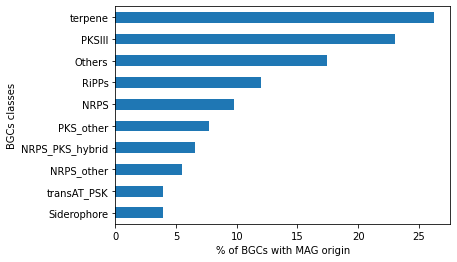

In [153]:
df = bigscape_extended.groupby("new_classif")["MAG"].value_counts()/bigscape_extended.groupby("new_classif")["Genome"].count()*100
df = df.to_frame().reset_index()
df = df[df["MAG"]==True].drop(columns="MAG").rename(columns={0:"% MAGs"}).sort_values(by="% MAGs", ascending=True).set_index("new_classif")
print(df)
ax = df.plot(kind="barh", legend=False)
ax.set_ylabel("BGCs classes")
ax.set_xlabel("% of BGCs with MAG origin")



In [ ]:
bigscape_extended[bigscape_extended["new_classif"] == "terpene"]["MAG"]
terpenes["MAG"].value_counts()/len(terpenes)*100

# Analysis

In [83]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

data = pd.read_csv("Clans_and_families_extended.csv")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Genome                       10234 non-null  object 
 1   BGC_full                     10234 non-null  object 
 2   Class                        10234 non-null  object 
 3   BiG-SCAPE class              10234 non-null  object 
 4   Product Prediction           10234 non-null  object 
 5   Clan                         10234 non-null  int64  
 6   Family_bgc                   10234 non-null  int64  
 7   Pfam_vector                  10234 non-null  object 
 8   Pfam_vector_length           10234 non-null  int64  
 9   Pfam_descriptor              10234 non-null  object 
 10  Region_Type                  10233 non-null  object 
 11  antiSMASH_classif            10233 non-null  object 
 12  new_classif                  10233 non-null  object 
 13  From            

In [85]:
data.groupby("BiG-SCAPE class")[["Clan", "Family_tax"]].describe()

Clan                                                    \
                  count         mean          std     min     25%     50%   
BiG-SCAPE class                                                             
NRPS              853.0  5292.849941  1369.214314  3528.0  4935.0  4935.0   
Others           3346.0  5314.133293  2466.669487  1848.0  4095.0  4095.0   
PKS-NRP_Hybrids   648.0  6544.952160  3822.579999  1848.0  1848.0  4935.0   
PKSother          938.0  2401.175906  1814.011120  1848.0  1848.0  1848.0   
RiPPs            1325.0  8160.670943  1324.299390  2447.0  7069.0  9045.0   
Terpene          3124.0  6350.106914  1289.078091  2581.0  6097.0  6097.0   

                                   
                     75%      max  
BiG-SCAPE class                    
NRPS              4935.0  10668.0  
Others            6470.0  11009.0  
PKS-NRP_Hybrids  10927.0  10927.0  
PKSother          1848.0  10091.0  
RiPPs             9045.0  10204.0  
Terpene           6097.0  10920.0

In [86]:
data.groupby("Clan").nunique().T

Clan,1848,1982,2447,2581,2584,2710,2750,2810,2975,3068,3103,3167,3188,3194,3528,3570,3897,3966,3967,4028,4069,4095,4148,4158,4294,4349,4477,4478,4509,4560,4568,4573,4598,4601,4638,4639,4733,4935,4990,5143,5315,5365,5381,5546,5609,5710,5727,5878,6005,6097,6133,6134,6346,6397,6470,6558,6603,6622,6637,6859,6910,6911,7069,7071,7218,7507,7508,7516,7763,7770,8095,8122,8148,8189,8424,8486,8573,8830,9045,9077,9211,9237,9673,9705,9827,9838,9847,9851,9888,9941,10039,10091,10101,10134,10189,10204,10206,10668,10844,10920,10927,11009
Genome,1079,13,4,7,12,9,81,5,2,40,8,6,6,19,34,4,4,29,22,28,7,1217,15,7,44,12,10,9,152,22,25,135,23,5,4,2,5,403,9,1,6,10,4,7,12,12,1,7,5,1862,41,4,7,3,142,163,18,2,32,46,9,32,214,46,5,52,3,8,9,1,3,33,8,106,7,28,11,30,629,12,30,56,293,86,4,31,29,17,9,6,187,15,1,7,73,5,5,12,16,13,194,32
BGC_full,1274,13,5,7,12,9,81,5,2,40,8,6,6,19,34,4,4,29,22,28,7,1602,15,7,44,12,10,9,152,22,25,135,23,5,4,2,5,835,9,1,6,10,4,7,12,12,1,7,5,2485,48,4,7,3,146,163,18,2,32,46,9,32,216,46,5,57,3,8,9,1,3,33,8,106,7,28,11,30,860,12,30,56,311,87,4,31,29,17,9,6,187,15,1,7,73,5,5,12,16,13,216,32
Class,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
BiG-SCAPE class,3,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Product Prediction,40,1,1,1,1,2,1,3,1,1,1,1,1,1,1,1,1,1,1,4,1,57,1,1,1,1,1,1,1,2,2,4,1,1,1,1,1,39,1,1,1,1,1,1,3,1,1,1,2,16,3,1,2,1,3,1,1,1,1,1,1,1,1,3,2,3,1,1,1,1,1,1,1,1,1,1,1,1,32,1,1,1,4,1,1,2,1,3,1,2,3,1,1,1,1,1,1,1,1,1,13,5
Clan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Family_bgc,347,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,3,1,3,1,421,2,1,3,1,1,1,4,1,1,6,1,1,1,1,1,582,1,1,1,1,1,1,1,1,1,1,1,570,3,1,1,1,6,5,1,1,2,4,1,3,8,3,1,1,1,1,1,1,1,3,1,4,1,1,1,3,368,2,1,2,7,5,1,2,3,1,1,1,5,1,1,1,4,1,1,1,2,1,132,1
Pfam_vector,1008,5,4,5,10,9,37,5,2,38,6,6,5,16,25,4,4,23,17,28,7,958,11,6,38,12,9,9,112,18,22,106,22,5,4,2,5,369,7,1,5,10,4,6,11,10,1,7,5,1608,35,4,7,3,138,140,11,2,32,46,8,29,173,46,5,35,3,8,6,1,3,33,7,44,6,20,11,27,540,12,14,28,246,83,3,30,26,17,7,6,181,14,1,7,72,5,5,9,16,13,184,30
Pfam_vector_length,84,3,3,5,10,8,24,5,2,27,5,4,3,14,14,3,3,17,12,24,6,84,6,4,23,12,7,9,45,12,16,46,18,5,4,2,4,78,6,1,3,7,4,5,9,9,1,5,4,81,23,3,7,3,58,54,10,2,20,23,6,21,54,25,5,22,3,7,6,1,3,20,5,18,5,12,10,15,74,10,10,20,64,45,2,26,22,16,6,4,61,12,1,5,40,5,5,7,13,13,63,20
Pfam_descriptor,1019,5,4,7,12,9,36,5,2,40,7,6,4,18,24,4,4,23,17,28,7,972,15,6,40,11,9,9,118,19,21,105,23,5,4,2,5,371,9,1,6,10,4,7,12,12,1,6,5,1621,35,4,7,3,140,140,14,2,31,44,8,30,175,46,5,34,3,7,7,1,3,31,5,46,6,19,11,28,547,11,16,31,247,85,3,30,29,17,9,6,184,13,1,7,72,5,5,9,16,13,191,30


In [87]:
#remove genus with less than 10 genomes
data_reduced =data.groupby('Genus').filter(lambda x : len(x)>10) 
data_reduced.groupby("Genus").nunique().T

Genus,Aequorivita,Algibacter,Algorimicrobium,Altibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceibacter,Croceitalea,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Eudoraea,Euzebyella,Flavobacterium,GCA-002723295,GCA-2733415,Gelidibacter,Gillisia,Gramella,HC6-5,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Maribacter_A,Mariniflexile,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muricauda_A,Muriicola,Myroides,Nonlabens,Olleya,Planobacterium,Polaribacter,Pricia,Pseudozobellia,Psychroflexus,Psychroserpens,RR4-38,Robiginitalea,SCGC-AAA160-P02,SHLJ01,SZUA-72,Salegentibacter,Salinimicrobium,Sinomicrobium,Tamlana_A,Tamlana_B,Tenacibaculum,UBA11891,UBA3478,UBA4166,UBA6231,UBA724,UBA7428,UBA7446,UBA7949,UBA8316,Uncl. Flavobacteriaceae,Uncl. Weeksellaceae,Winogradskyella,Xanthomarina,Zobellia,Zunongwangia
Genome,42,9,7,5,21,39,22,14,8,64,21,294,6,4,8,11,193,41,31,4,9,588,5,3,12,11,16,3,9,48,8,9,38,16,26,7,7,12,18,45,5,5,14,9,19,53,5,8,39,28,13,11,57,3,2,17,11,6,4,4,11,2,19,6,3,6,2,68,8,5,4,13,9,6,12,6,12,17,3,55,11,6,12
BGC_full,124,16,14,18,23,371,103,15,20,181,49,2250,24,13,29,44,565,93,62,19,48,2489,11,15,29,39,46,11,21,91,75,15,137,19,41,12,14,19,32,171,11,8,45,19,66,164,11,28,69,83,22,14,122,15,11,47,28,19,13,15,14,13,54,12,25,16,7,232,13,12,13,18,17,11,20,18,21,48,12,137,20,33,30
Class,3,4,3,3,2,6,5,1,4,1,4,6,3,4,6,6,4,4,3,5,5,6,2,6,5,5,4,3,5,4,6,4,6,3,2,2,1,2,2,6,3,4,3,3,3,6,4,5,6,5,4,2,4,5,4,4,5,4,4,4,2,5,4,2,4,2,5,6,1,2,3,3,1,1,1,4,2,6,4,6,2,5,3
BiG-SCAPE class,3,3,2,3,2,6,5,1,3,1,4,6,3,4,6,6,4,4,3,5,4,6,2,5,4,5,4,3,5,4,6,4,6,3,2,2,1,2,2,6,3,2,3,3,3,6,3,4,5,5,4,2,4,5,3,4,4,4,4,4,2,5,4,2,4,2,3,6,1,2,3,3,1,1,1,4,2,6,4,6,2,4,3
Product Prediction,7,3,4,4,3,31,6,1,4,2,7,47,3,4,8,10,6,8,6,7,6,51,2,9,5,7,5,6,7,7,12,5,9,3,2,2,1,2,2,12,3,2,6,3,7,14,3,5,10,7,5,2,7,8,5,7,6,4,4,7,2,7,5,2,8,3,3,15,1,2,4,4,1,1,1,6,2,11,4,9,3,7,3
Clan,6,5,3,3,2,9,9,1,4,2,4,35,3,4,6,6,10,7,4,5,5,32,2,6,5,7,5,5,5,4,6,4,11,3,4,2,1,2,2,8,4,4,4,3,3,8,5,5,10,7,4,2,4,5,4,4,5,5,4,4,2,5,5,2,5,2,5,7,1,2,3,3,3,1,3,4,2,6,4,6,3,5,3
Family_bgc,23,4,7,12,4,181,21,6,7,47,17,443,8,10,22,22,44,17,23,17,9,557,5,12,16,20,20,12,16,32,55,10,29,8,8,8,3,7,9,45,9,5,15,9,28,61,7,18,27,29,8,5,36,14,11,25,14,8,10,10,7,13,9,4,19,7,5,86,3,5,5,7,3,6,3,12,8,42,4,40,5,17,7
Pfam_vector,36,8,7,5,7,38,20,14,6,60,16,245,6,4,8,11,82,34,31,4,9,495,5,3,12,11,16,3,9,45,8,8,34,16,25,7,7,12,18,38,5,5,13,9,16,45,5,8,26,24,12,10,54,3,2,17,9,6,4,4,11,2,19,6,3,6,2,46,8,5,3,9,7,6,11,6,11,16,3,54,11,5,11
Pfam_vector_length,25,6,6,4,5,30,16,12,6,31,10,66,4,3,7,10,28,22,22,3,8,70,3,2,9,7,11,3,6,24,7,6,24,9,15,6,6,11,12,20,4,4,11,7,13,22,5,8,14,21,7,7,27,3,2,14,7,6,4,4,7,2,13,5,3,6,2,22,7,5,3,6,5,6,9,6,9,13,3,31,10,4,11
Pfam_descriptor,38,6,7,5,6,38,21,14,7,60,14,247,6,4,8,10,83,34,31,4,9,492,5,3,12,11,16,3,9,43,8,8,36,16,25,7,7,12,18,45,5,5,14,8,19,47,5,8,28,28,12,10,52,3,2,16,10,6,4,4,11,2,19,6,3,6,2,48,8,5,4,9,8,6,12,6,11,17,3,55,11,6,12


In [88]:
#between families, what is the percentage of equal BGCs?
data.groupby("Family_bgc")["Pfam_vector"].nunique()

Family_bgc
1500     18
1639      1
1815      1
1824     17
1838      1
         ..
11088     1
11092    39
11107     1
11112     1
11113     1
Name: Pfam_vector, Length: 2297, dtype: int64

In [89]:
#data.groupby("Pfam_vector")["Genome"].nunique().T.plot(kind="barh")

In [90]:
data["Pfam_vector"].nunique()

2136

In [91]:
data.groupby("BiG-SCAPE class").size()

BiG-SCAPE class
NRPS                853
Others             3346
PKS-NRP_Hybrids     648
PKSother            938
RiPPs              1325
Terpene            3124
dtype: int64

In [92]:
data[data["BiG-SCAPE class"]=="PKSother"]["Clan"].value_counts()

1848     850
9211      30
6603      18
10091     15
5710      12
4990       9
5381       4
Name: Clan, dtype: int64

In [93]:
data_reduced[data_reduced["BiG-SCAPE class"]=="PKSother"].groupby(["Family_bgc","Clan","Genus"]).count()#.sort_values(by="Family_bgc",ascending=False)

Genome  BGC_full  Class  \
Family_bgc Clan  Genus                                              
1849       1848  Kordia                        1         1      1   
1959       1848  Flavobacterium                9         9      9   
2010       1848  Nonlabens                     2         2      2   
2035       1848  Dokdonia                      1         1      1   
2037       1848  Aequorivita                   2         2      2   
                 Altibacter                    1         1      1   
                 Muricauda                     1         1      1   
                 Psychroflexus                 6         6      6   
2044       1848  Flavobacterium                3         3      3   
                 Kaistella                     1         1      1   
2059       1848  SCGC-AAA160-P02               1         1      1   
2075       1848  Flavobacterium                1         1      1   
2113       1848  Arenibacter                   2         2      2   
2302       1848  Aquimarina                    5         5      5   
2335       1848  Maribacter                    1         1      1   
2354       1848  Polaribacter                  1         1      1   
2397       1848  Leeuwenhoekiella              1         1      1   
2439       1848  Chryseobacterium              1         1      1   
2445       1848  Chryseobacterium              4         4      4   
2550       1848  Chryseobacterium              1         1      1   
2583       1848  Nonlabens                     2         2      2   
2588       1848  Flavobacterium                4         4      4   
2627       1848  Flavobacterium                2         2      2   
2649       1848  Chryseobacterium              1         1      1   
2773       1848  Flavobacterium                2         2      2   
2785       1848  Chryseobacterium              2         2      2   
2793       1848  Chryseobacterium              2         2      2   
2921       1848  Chryseobacterium              6         6      6   
2951       1848  Flavobacterium                3         3      3   
3019       1848  Chryseobacterium              1         1      1   
3027       1848  Chryseobacterium              1         1      1   
3040       1848  Aquimarina                    1         1      1   
3152       1848  Flavobacterium                2         2      2   
3161       1848  GCA-002723295                 1         1      1   
                 Muricauda                     1         1      1   
                 Polaribacter                  8         8      8   
                 Psychroserpens                4         4      4   
                 UBA6231                       1         1      1   
3402       1848  Chryseobacterium             23        23     23   
3413       1848  Chryseobacterium             17        17     17   
3433       1848  Flavobacterium                2         2      2   
3480       1848  Polaribacter                  3         3      3   
3813       1848  Nonlabens                     1         1      1   
3820       1848  Flavobacterium               16        16     16   
3837       1848  Arenibacter                   2         2      2   
3892       1848  Polaribacter                  1         1      1   
3893       1848  Polaribacter                  1         1      1   
3950       1848  Chryseobacterium              1         1      1   
3994       1848  Flavobacterium                5         5      5   
4012       1848  Flavobacterium                4         4      4   
4017       1848  Flavobacterium                2         2      2   
4047       1848  Flavobacterium                3         3      3   
4050       1848  Flavobacterium                6         6      6   
4058       1848  Flavobacterium                1         1      1   
4064       1848  Flavobacterium                2         2      2   
4076       1848  Flavobacterium                1         1      1   
4084       1848  Flavobacterium         